<a href="https://colab.research.google.com/github/HienPham2k1/Machine-Learning/blob/main/Ph%E1%BA%A1m_Th%E1%BB%8B_Thu_Hi%E1%BB%81n_ML_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
churndf=pd.read_excel('/content/churn_prediction.xlsx')
churndf.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


### **EDA:**

#### **1/ Overview data:**


In [ ]:
churndf.shape

(5630, 20)

In [ ]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   



* Bộ dữ liệu có 5630 dòng và 20 cột
* Trong đó, có các cột chứa dữ liệu Null là: Tenure, WarehouseToHome, HoursSpendOnApp,OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder


*   Ngoài những cột chứa giá trị số còn có các cột chứa giá trị Category như: PreferedLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus





In [ ]:
churndf.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000




*   Đánh giá tổng quan thấy được rằng có một số cột có outlier như: Tenure, WarhouseToHome, NumberOfAddress, CouponUsed, OrderCount, DaySinceLastOrder
*   Đây đều là những cột có giá trị max rất lớn và có khoảng cách rất lớn với giá trị mean



#### **2/ Handle missing value & duplicate value**


--> Data does not have null values

In [ ]:
churndf['CustomerID'].nunique()

5630

In [ ]:
print(churndf.isna().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
threshold= len(churndf)*0.05
print(threshold)

281.5


In [ ]:
#Với những cột có số lượng giá trị Null nhỏ hơn threshold thì những giá trị Null sẽ bị loại bỏ
cols_to_drop=churndf.columns[churndf.isna().sum()<= threshold ]
churndf.dropna(subset=cols_to_drop,inplace=True )
print(churndf.isna().sum())

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
# còn lại cột DaySinceLastOrder có giá trị Null lớn hơn threshold
#có thể điền các giá trị còn thiếu bằng 0
cols_with_missing_values = churndf.columns[churndf.isna().sum() >0]
print(cols_with_missing_values)

Index(['DaySinceLastOrder'], dtype='object')


In [ ]:
for col in cols_with_missing_values:
  churndf[col].fillna(0, inplace= True )

In [ ]:
#Hiện tại các cột trong bảng dữ liệu đã không còn giá trị NUll
# Số lượng dữ liệu còn lại của bảng dữ liệu còn 4081 dòng và 20 cột
churndf.shape

(4081, 20)

#### **3/ Univariate Analyse**

Unique values of CustomerID: 4081
Unique values of Churn: 2
Unique values of Tenure: 34
Unique values of CityTier: 3
Unique values of WarehouseToHome: 34
Unique values of HourSpendOnApp: 6
Unique values of NumberOfDeviceRegistered: 6
Unique values of SatisfactionScore: 5
Unique values of NumberOfAddress: 14
Unique values of Complain: 2
Unique values of OrderAmountHikeFromlastYear: 16
Unique values of CouponUsed: 16
Unique values of OrderCount: 16
Unique values of DaySinceLastOrder: 22
Unique values of CashbackAmount: 1846


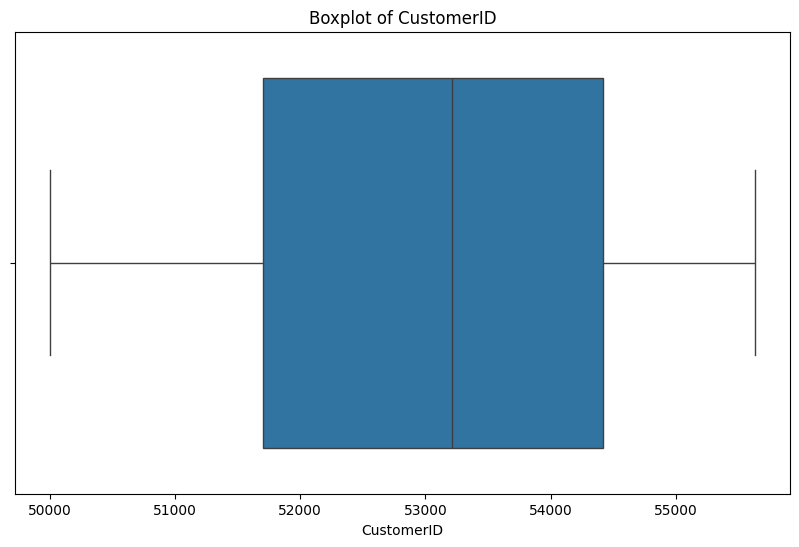

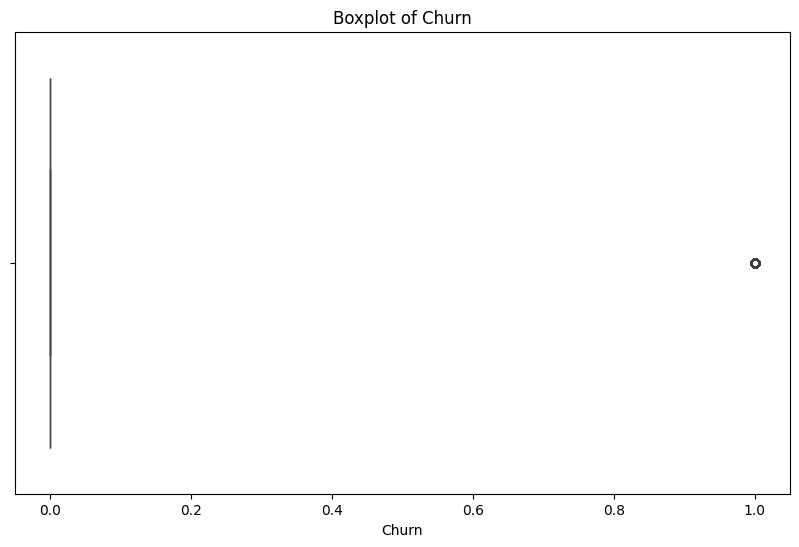

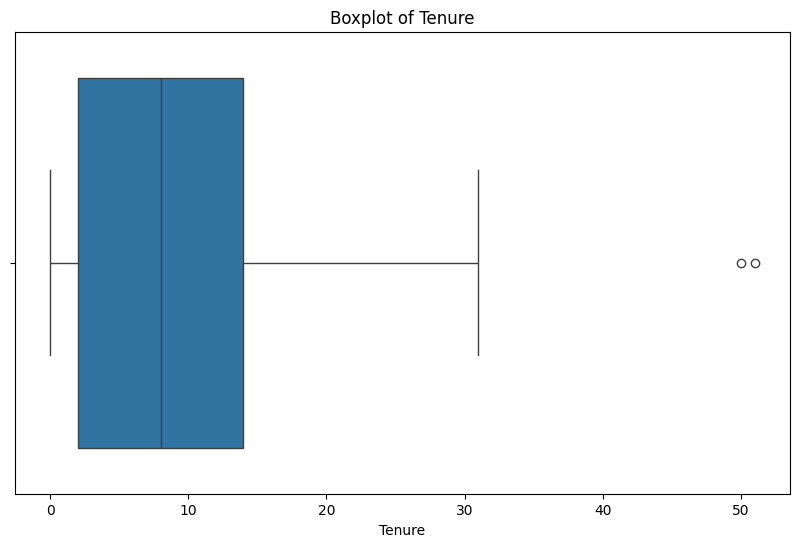

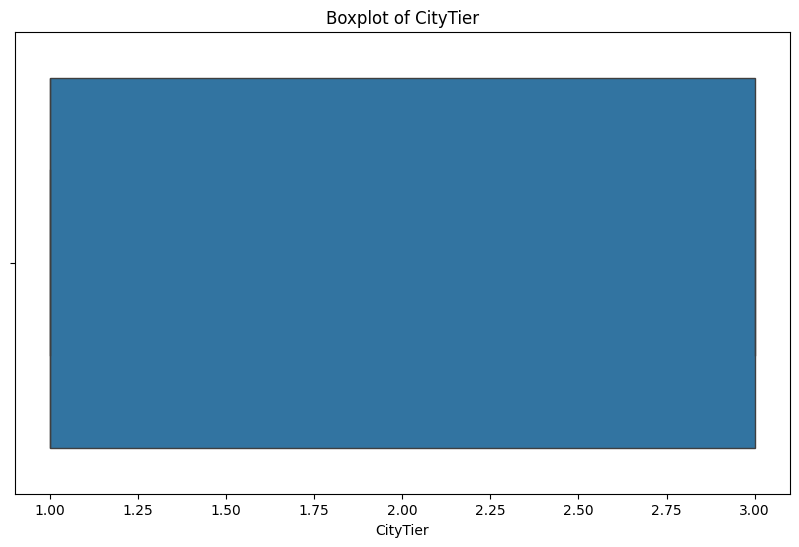

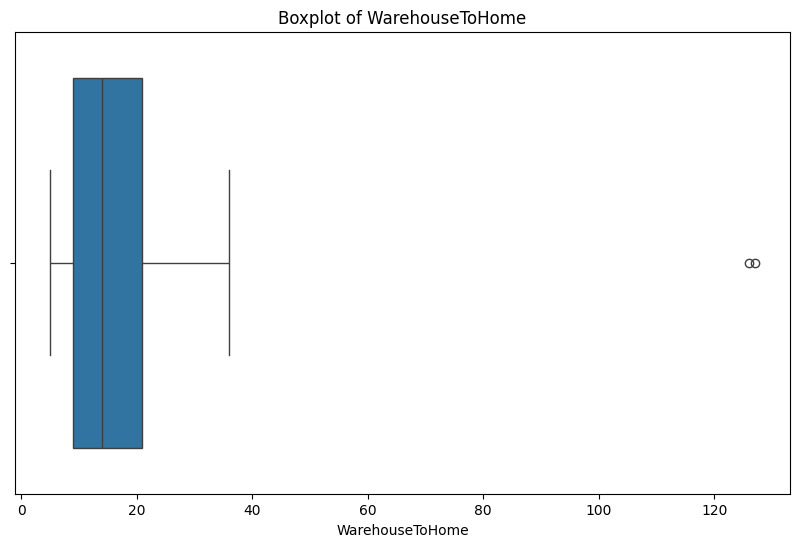

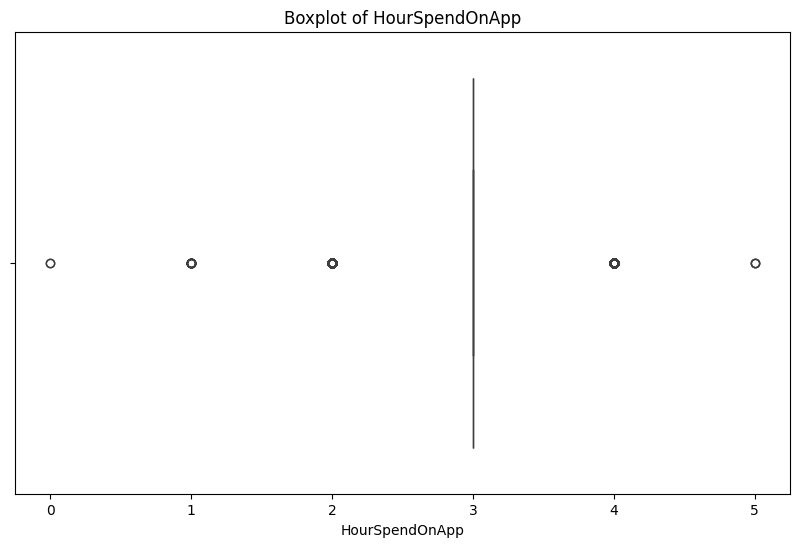

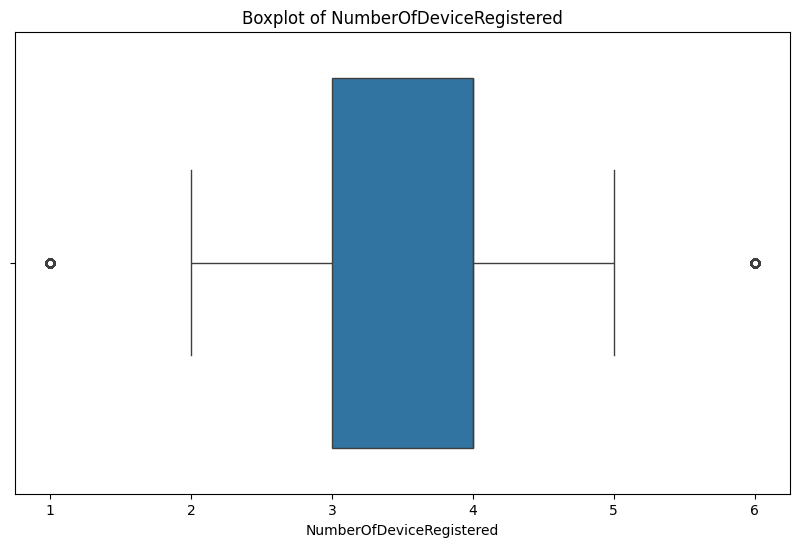

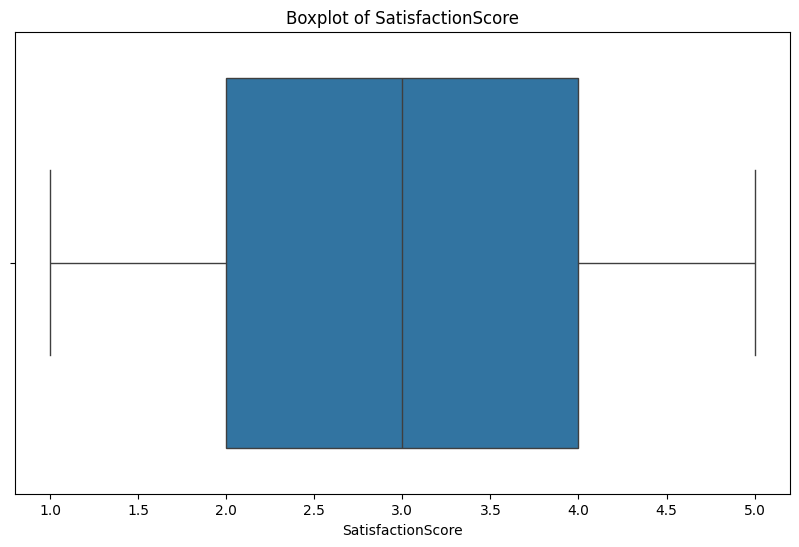

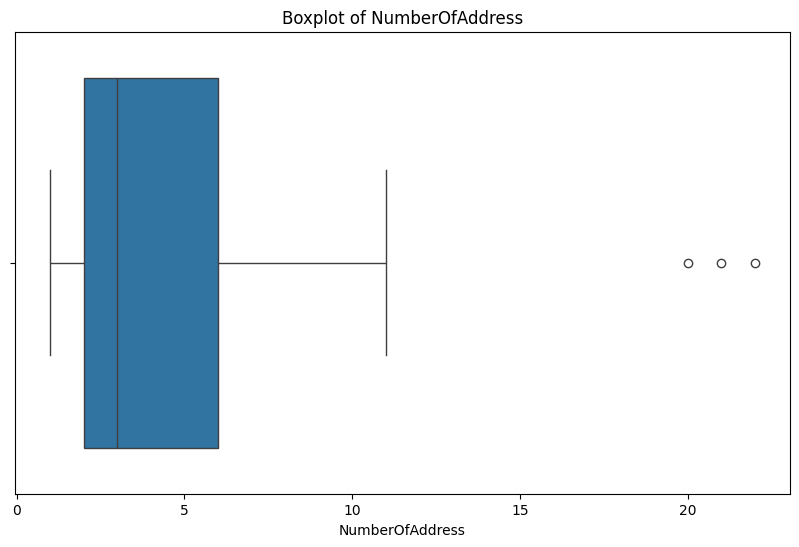

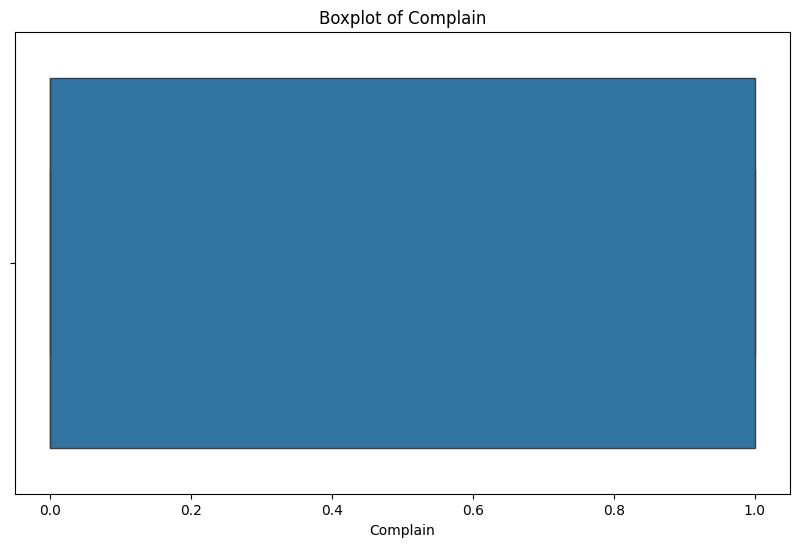

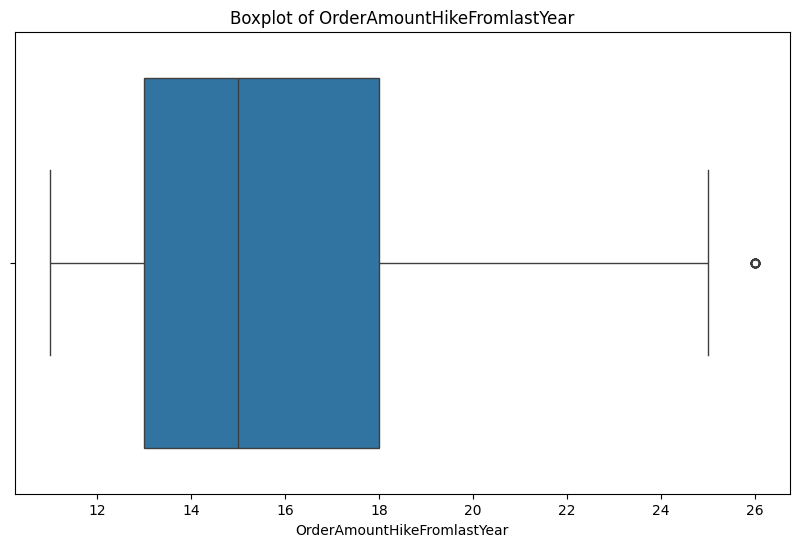

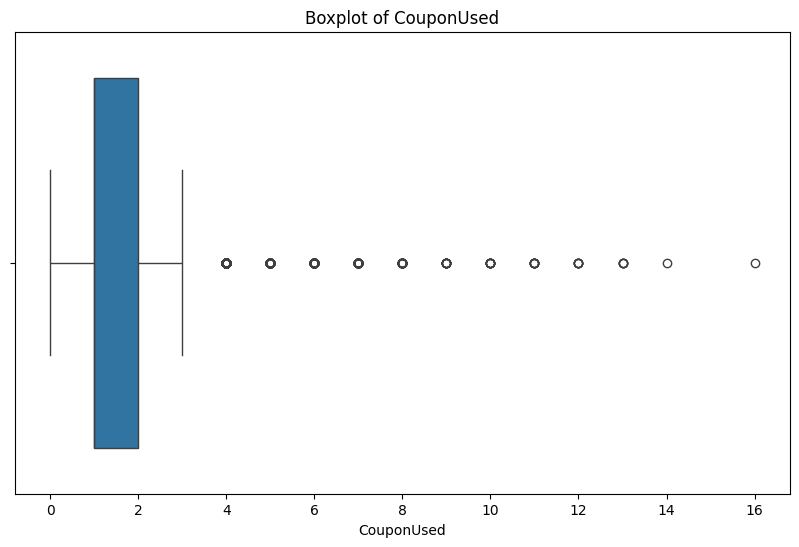

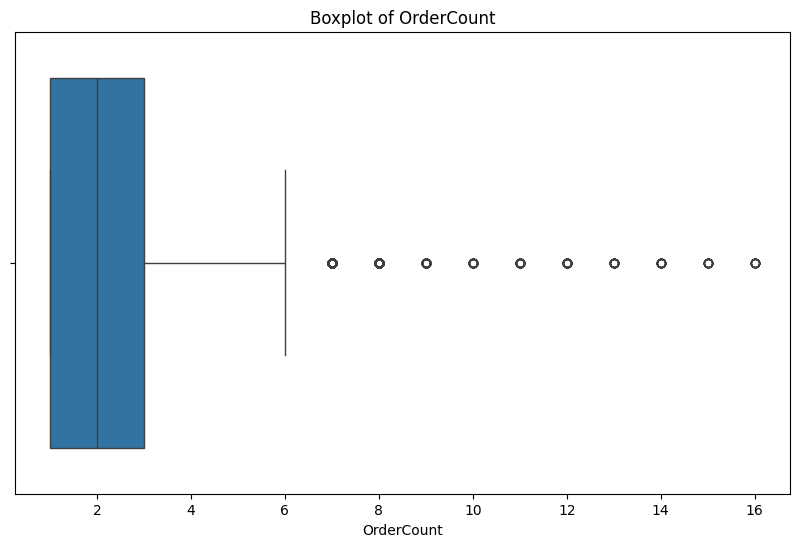

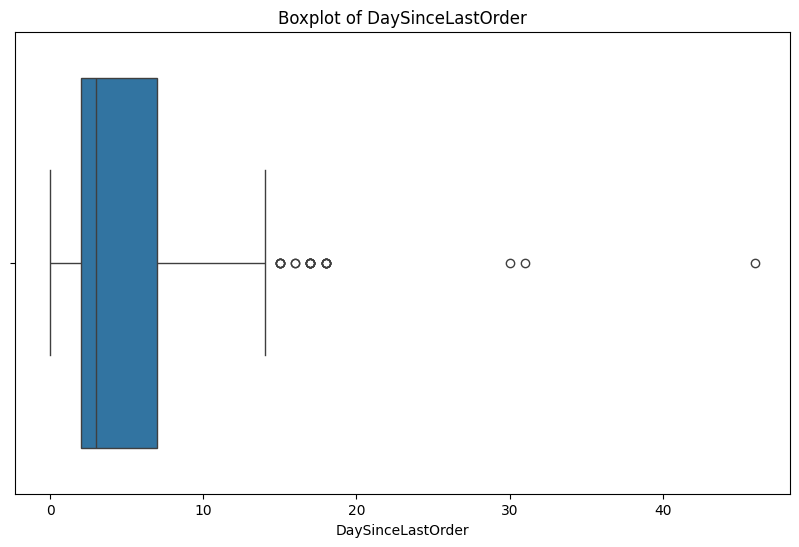

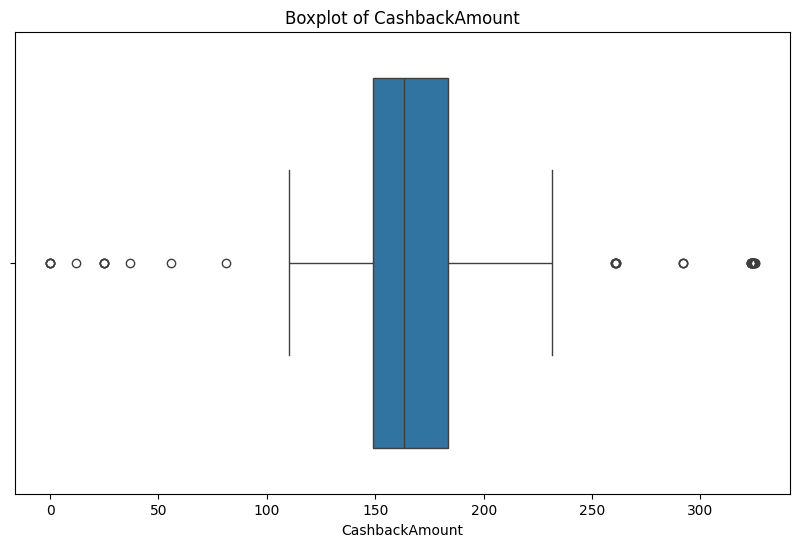

In [ ]:
numeric_cols = churndf.loc[:, churndf.dtypes != object].columns.tolist()


for col in numeric_cols:
    print(f"Unique values of {col}: {churndf[col].nunique()}")

for col in numeric_cols:
    plt.figure(figsize=(10, 6))  # Set the size of the plot
    sns.boxplot(x=churndf[col])
    plt.title(f'Boxplot of {col}')  # Title of the plot
    plt.show()

Nhìn vào những biểu đồ trên, có những biểu đồ cần chú ý như:


*   Tenure: tập khách hàng ưa chuộng các gói từ 2 đến dưới 15 tháng, trong khi đó, xuất hiện những gói dài hạn trên 50, tuy nhiên khá ít
*   WarehousetoHome: khoảng cách phổ rộng tại tập dữ liệu là khoảng cách từ 15 đến 22 km. Tuy nhiên vẫn có những ngoại lệ, khoảng cách trên 120km, rất hiếm hoi


*   NumberofAddress: Địa chỉ mà khách hàng cung cấp sẽ có số lượng từ 2 đến 6, tuy nhiên thấy được trong bộ dữ liệu có những khách hàng cung cấp trên 20 địa chỉ
*   DaySincelastOrder: Kể từ lần mua cuối cùng của khách hàng cho đến khi dữ liệu được thu thập, số lượng nhiều nhất là từ 2 đến 8 ngày, trong đó có những khách hàng đã hơn 40 ngày chưa quay trở lại

Đánh giá tổng quát, thấy được rằng dứ liệu được thu thập phần đông có tập khách hàng mới trải nghiệm, với lần mua khá gần đây cùng với gói tenure từ 2 đến dưới 15 tháng. Vị trí nhà không quá xa bên kho của công ty, địa chỉ là nhà ở hoặc trên công ty





Unique values of PreferredLoginDevice: 3
Unique values of PreferredPaymentMode: 7
Unique values of Gender: 2
Unique values of PreferedOrderCat: 6
Unique values of MaritalStatus: 3


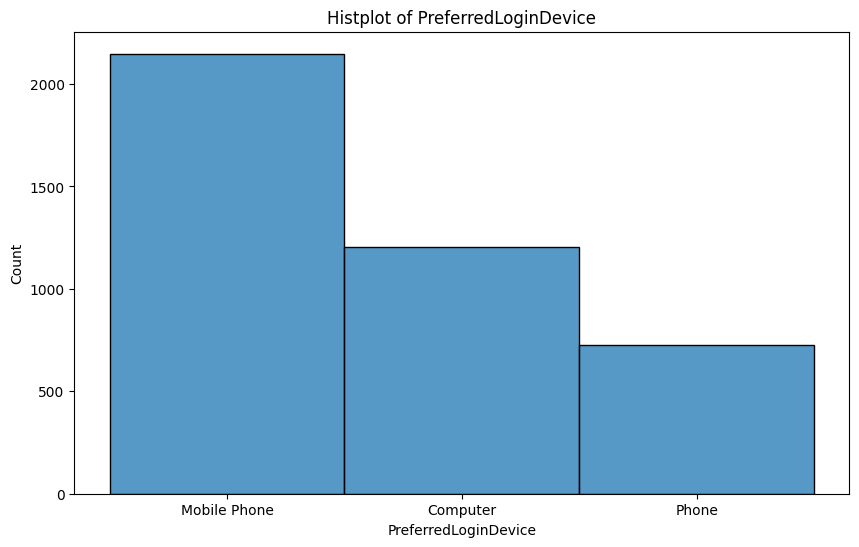

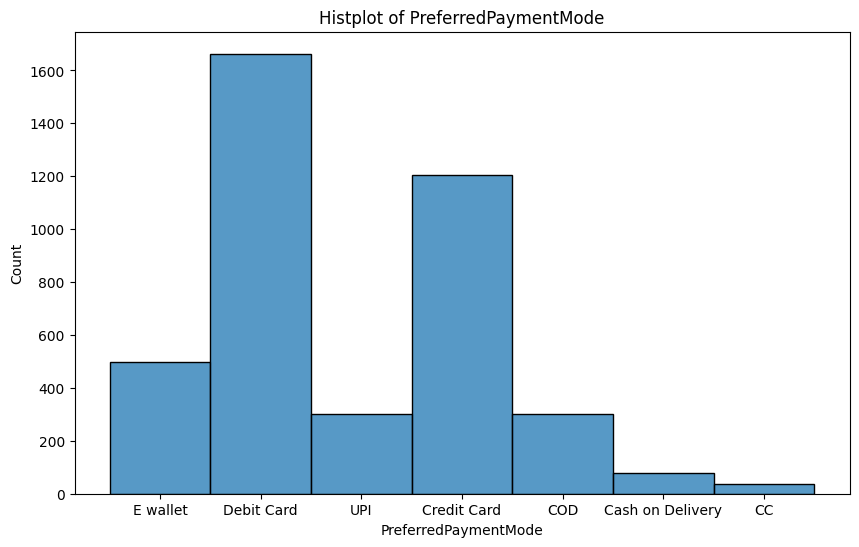

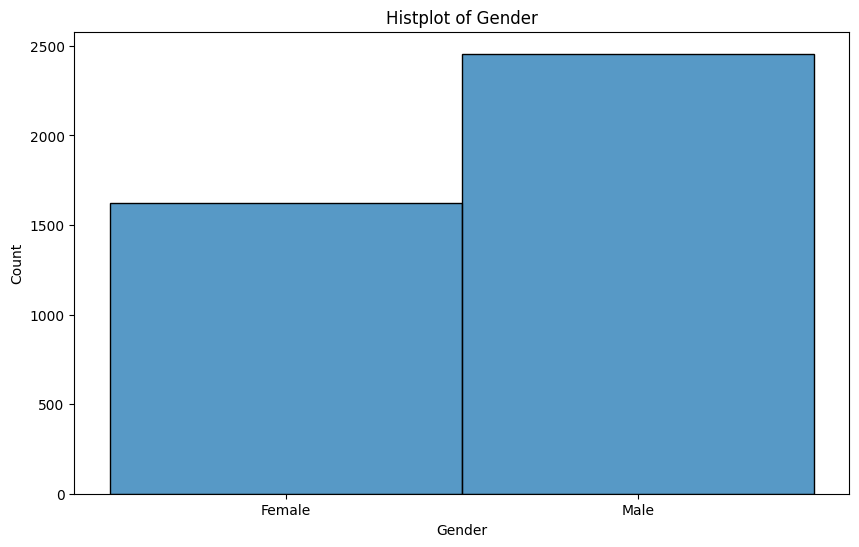

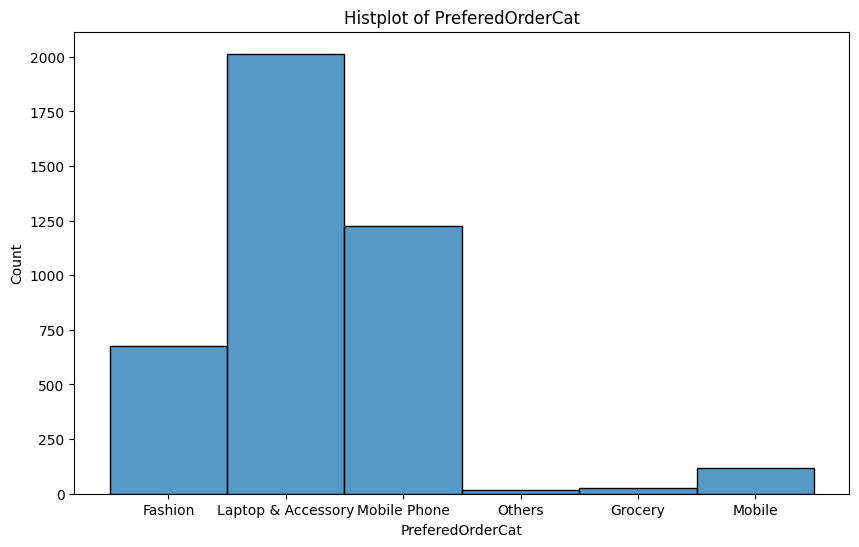

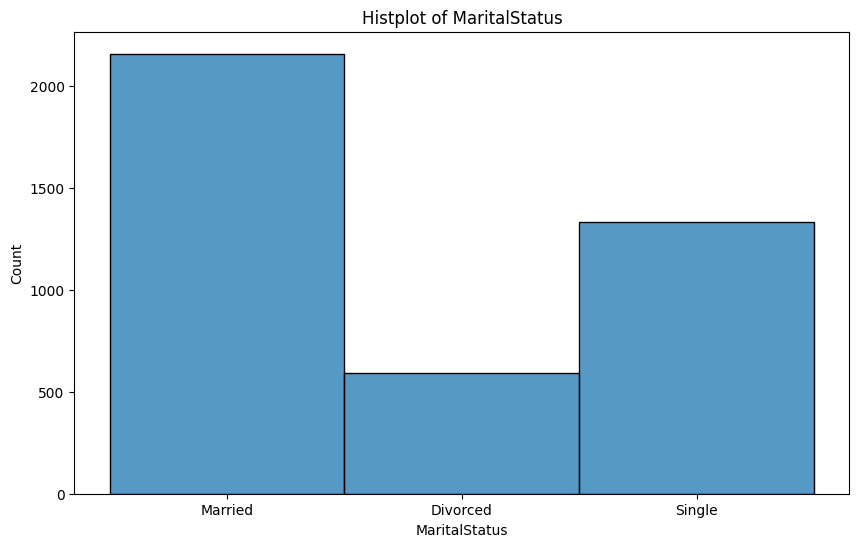

In [ ]:
# Category data:

cate_cols = churndf.loc[:, churndf.dtypes == object].columns.tolist()

for col in cate_cols:
    print(f"Unique values of {col}: {churndf[col].nunique()}")
for col in cate_cols:
    plt.figure(figsize=(10, 6))  # Set the size of the plot
    sns.histplot(x=churndf[col], binwidth =.1)
    plt.title(f'Histplot of {col}')  # Title of the plot
    plt.show()

Từ những biểu đồ về category của bộ dữ liệu, ta có thể đánh giá tổng quan:


*   PreferredLoginDevice: Khách hàng ưa chuộng Mobile phone và Computer hơn hẳn Phone, trong đó Mobile phone chiếm tỉ trọng lớn nhất
*   PreferredPaymentMode: Chiếm tỉ trọng vượt trội hẳn là Debit Card và Credit Card, sau đó là đến E wallet


*   Gender: tỉ lệ Nam nhiều hơn Nữ, tuy nhiên chênh lệch không nhiều
*   PreferedOrderCat: sản phẩm bán nhiều vượt trội là Laptop & Accessory và Mobile Phone, sau đó là đến Fashion


*   MarialStatus: Khách hàng trong tập dữ liệu phần đông thuộc vào mục đã kết hôn, chiếm tỉ trọng phần đông. Đứng thứ hai là nhóm những người độc thân

Đánh giá tổng quan: tập khách hàng của doanh nghiệp sẽ là tuýp người ưu chuộng đồ công nghệ, trong đó phần đông là những người đã có gia đình, có thu nhập khá. Với những người phụ nữ còn độc thân thì họ sẽ yêu thích thời trang hơn.  







#### **4/  Bivariate and Multivariate Analysis**

<Axes: >

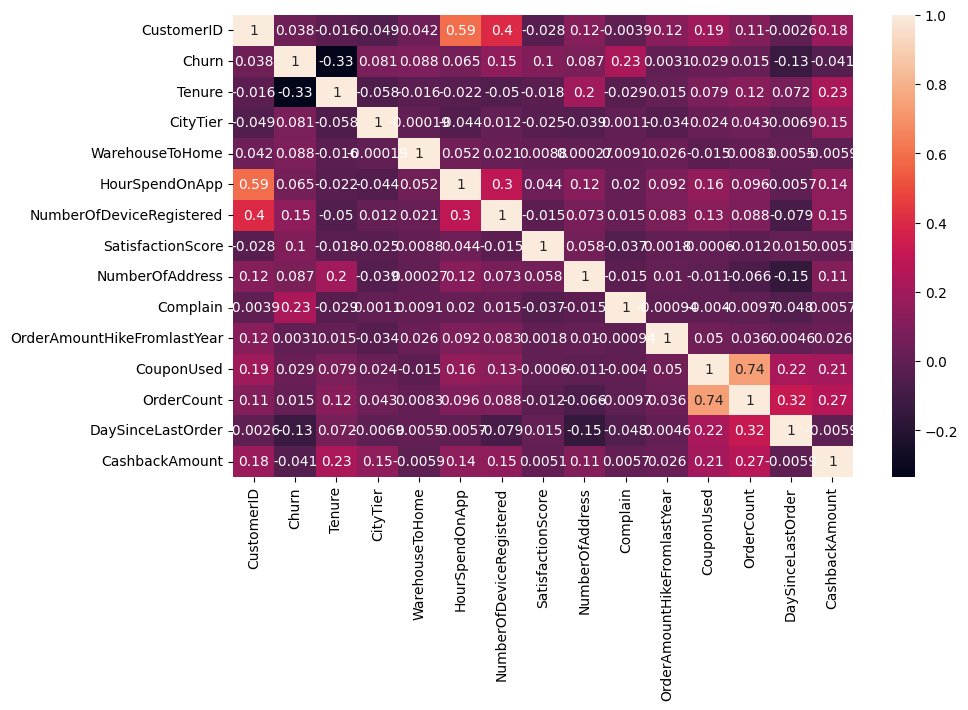

In [ ]:
#Correlation:
plt.figure(figsize=(10, 6))  # Set the size of the plot
data1=churndf.select_dtypes(include=['number'])
sns.heatmap(data1.corr(), annot = True)

Đánh giá khái quát:


*   Mối tương quan giữa các cột tương đối thấp, chỉ có một số cột có mối tương quan rõ ràng
*   NumberofDeviceRegistered và HourSpendOnApp có mối tương quan cùng chiều khá cao (0.3).


*   CouponUsed và OrderCount có mối tương quan cùng chiều cao (0.74), trong khi đó, OrderCount và DaySinceLastOrder cũng có mối tương quan cùng chiều khá (0.32)





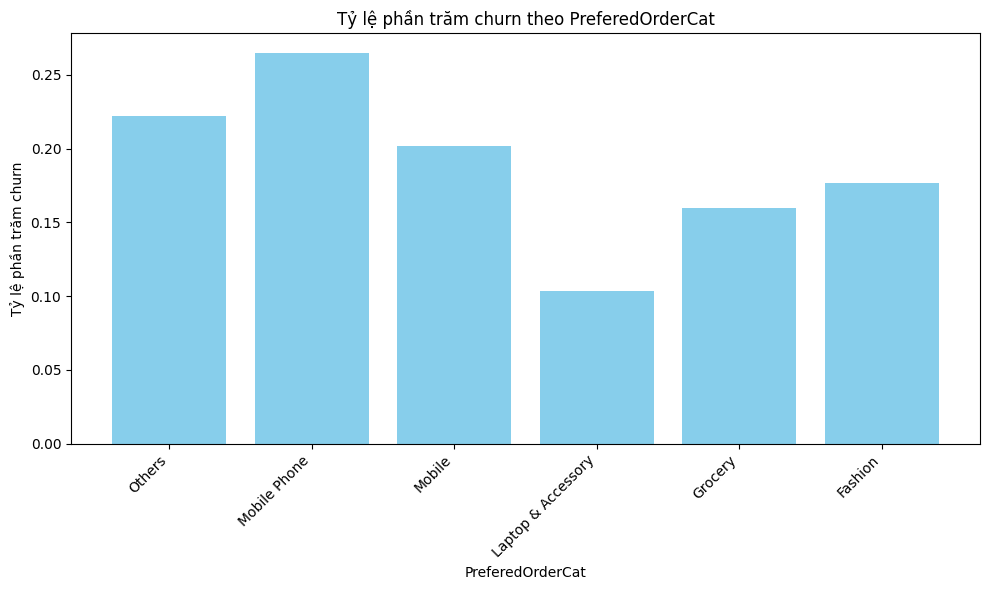

In [ ]:
    # Create 2 dataframes of churn and non-churn
customer_churn = churndf[churndf['Churn']==1].groupby(churndf['PreferedOrderCat'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['PreferedOrderCat'])
customer_not_churn = churndf[churndf['Churn']==0].groupby(['PreferedOrderCat'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['PreferedOrderCat'])

    #Merge 2 dataframe into one:
cate_df = customer_churn.merge(customer_not_churn, on = ['PreferedOrderCat'] , how = 'outer')
cate_df = cate_df.fillna(0)
cate_df.rename(columns = {'CustomerID'+'_x':'churn','CustomerID'+'_y':'not_churn'}, inplace = True)

    #Caculate the percentage:
cate_df['%'] = cate_df['churn']/(cate_df['churn']+cate_df['not_churn'])

plt.figure(figsize=(10, 6))
plt.bar(cate_df['PreferedOrderCat'], cate_df['%'], color='skyblue')
plt.xlabel('PreferedOrderCat')
plt.ylabel('Tỷ lệ phần trăm churn')
plt.title('Tỷ lệ phần trăm churn theo PreferedOrderCat')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.tight_layout()  # Căn chỉnh tự động để tránh bị cắt
plt.show()




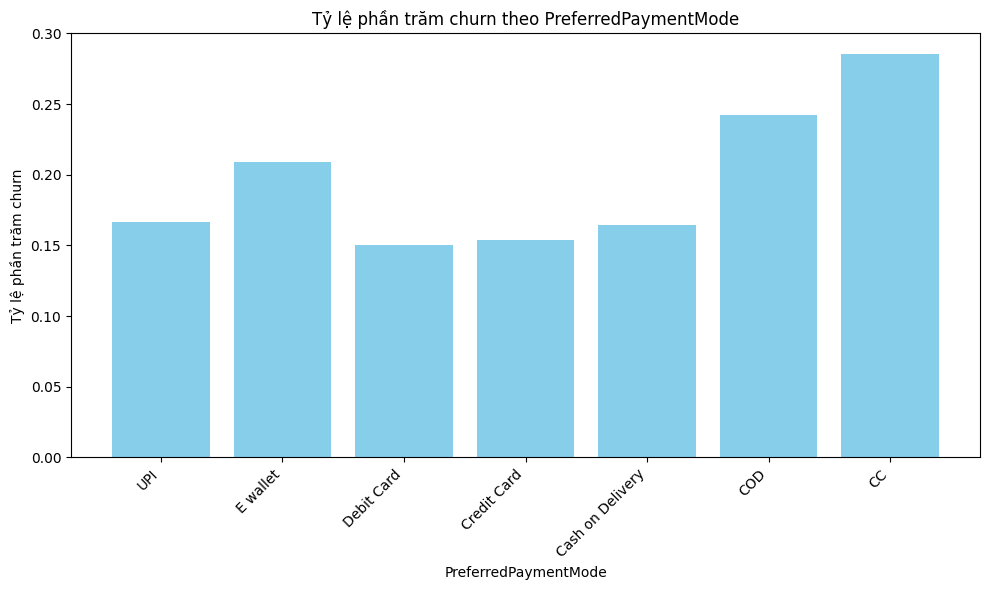

In [ ]:
    # Create 2 dataframes of churn and non-churn
customer_churn = churndf[churndf['Churn']==1].groupby(churndf['PreferredPaymentMode'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['PreferredPaymentMode'])
customer_not_churn = churndf[churndf['Churn']==0].groupby(['PreferredPaymentMode'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['PreferredPaymentMode'])

    #Merge 2 dataframe into one:
cate_df = customer_churn.merge(customer_not_churn, on = ['PreferredPaymentMode'] , how = 'outer')
cate_df = cate_df.fillna(0)
cate_df.rename(columns = {'CustomerID'+'_x':'churn','CustomerID'+'_y':'not_churn'}, inplace = True)

    #Caculate the percentage:
cate_df['%'] = cate_df['churn']/(cate_df['churn']+cate_df['not_churn'])

plt.figure(figsize=(10, 6))
plt.bar(cate_df['PreferredPaymentMode'], cate_df['%'], color='skyblue')
plt.xlabel('PreferredPaymentMode')
plt.ylabel('Tỷ lệ phần trăm churn')
plt.title('Tỷ lệ phần trăm churn theo PreferredPaymentMode')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc
plt.tight_layout()  # Căn chỉnh tự động để tránh bị cắt
plt.show()




In [ ]:
    # Create 2 dataframes of churn and non-churn
customer_churn1 = churndf[churndf['Churn']==1].groupby(churndf['Gender'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['Gender'])
customer_not_churn1 = churndf[churndf['Churn']==0].groupby(['Gender'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['Gender'])

customer_churn2 = churndf[churndf['Churn']==1].groupby(churndf['PreferredLoginDevice'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['PreferredLoginDevice'])
customer_not_churn2 = churndf[churndf['Churn']==0].groupby(['PreferredLoginDevice'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['PreferredLoginDevice'])

customer_churn3 = churndf[churndf['Churn']==1].groupby(churndf['MaritalStatus'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['MaritalStatus'])
customer_not_churn3 = churndf[churndf['Churn']==0].groupby(['MaritalStatus'])[['CustomerID']].count().reset_index().sort_values(ascending=False, by = ['MaritalStatus'])
    #Merge 2 dataframe into one:
cate_gen = customer_churn1.merge(customer_not_churn1, on = ['Gender'] , how = 'outer')
cate_gen = cate_gen.fillna(0)
cate_gen.rename(columns = {'CustomerID'+'_x':'churn','CustomerID'+'_y':'not_churn'}, inplace = True)

cate_device = customer_churn2.merge(customer_not_churn2, on = ['PreferredLoginDevice'] , how = 'outer')
cate_device = cate_device.fillna(0)
cate_device.rename(columns = {'CustomerID'+'_x':'churn','CustomerID'+'_y':'not_churn'}, inplace = True)

cate_status = customer_churn3.merge(customer_not_churn3, on = ['MaritalStatus'] , how = 'outer')
cate_status = cate_status.fillna(0)
cate_status.rename(columns = {'CustomerID'+'_x':'churn','CustomerID'+'_y':'not_churn'}, inplace = True)
    #Caculate the percentage:
cate_gen['%'] = cate_gen['churn']/(cate_gen['churn']+cate_gen['not_churn'])
cate_device['%'] = cate_device['churn']/(cate_device['churn']+cate_device['not_churn'])
cate_status['%'] = cate_status['churn']/(cate_status['churn']+cate_status['not_churn'])

print(cate_gen)
print(cate_device)
print(cate_status)

   Gender  churn  not_churn         %
0    Male    443       2013  0.180375
1  Female    242       1383  0.148923
  PreferredLoginDevice  churn  not_churn         %
0                Phone    151        576  0.207703
1         Mobile Phone    306       1842  0.142458
2             Computer    228        978  0.189055
  MaritalStatus  churn  not_churn         %
0        Single    347        985  0.260511
1       Married    245       1912  0.113584
2      Divorced     93        499  0.157095


Đánh giá tổng quan:


*   PreferedorderCategory: Tỉ lệ churn ở Mobile phone chiếm tỉ trọng cao nhất, sau đó là tới others và mobiles  
*   PreferredPaymentMethod: Tỉ lệ churn CC và COD là cao nhất


*   Gender: Tỉ lệ churn ở Male có xu hướng cao hơn so với Female
*   PreferredLoginDevice: Tỉ lệ churn ở Phone cao hơn hẳn so với các thiết bị khác, tỉ lệ churn cao thứ hai là Computer


*   MaritalStatus: Tỉ lệ churn ở nhóm khách hàng Single là cao nhất

Từ đây có thể đưa ra giả thiết rằng, nhóm khách hàng churn cao là nhóm khách hàng sử dụng các mặt hàng công nghệ, với cách chi trả là CC hoặc COD.
Tỉ lệ churn cao ở những người sử dụng Phone để đăng nhập ứng dụng, những người độc thân thường có xu hướng churn cao hơn những nhóm khách hàng khác





Để có thể giảm tỉ lệ khách hàng churn. Công ty cần xem xét đến hai yếu tố:
1. Tại sao khách hàng đã mua một lần tại công ty và không có lần mua thứ hai? Là do vấn đề khách quan hay chủ quan
2. Sản phẩm của công ty đang có vấn đề gì không? Xu hướng hiện nay của sản phẩm là gì? Sản phẩm của công ty có phải đang đi sau hay kém cạnh tranh hơn những công ty khác?
==> Từ những dữ liệu được cung cấp, tỷ lệ churn cao ở những khách hàng yêu thích công nghệ, còn khá trẻ, tuy nhiên ưa chuộng việc trả tiền mặt thay vì dùng ngân hàng điện tử. => Có thể đưa ra một số voucher, khuyến mãi cho những tài khoản có lần liên kết ngân hàng đầu tiên. Những voucher freeship, giảm giá khi mua phụ kiện cũng khuyến khích được nhóm khách hàng mua thêm



### **Feature Engineering:**

### **Feature Transforming:**

In [ ]:
df_encoded = pd.get_dummies(churndf, columns = cate_cols)
df_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,52869,0,20.0,3,7.0,4.0,4,5,3,0,...,False,True,False,False,False,False,False,False,True,False
2,52972,0,16.0,3,7.0,3.0,4,3,3,0,...,True,False,False,True,False,False,False,True,False,False
3,53125,0,5.0,1,16.0,3.0,4,4,3,0,...,True,True,False,False,False,False,False,False,True,False
4,53367,0,9.0,1,28.0,3.0,4,2,3,1,...,False,False,False,True,False,False,False,True,False,False
5,53544,0,1.0,1,16.0,3.0,4,5,3,0,...,True,False,False,False,False,True,False,False,False,True


### **Model Training**

[link text](https:// [link text](https://))### 1/. Split/train/validate/test set:

In [ ]:
from sklearn.model_selection import train_test_split
x=df_encoded.drop('Churn', axis = 1)
y=df_encoded[['Churn']]


x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state=42)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of validate set: {len(x_val)}")
print(f"Number data of test set: {len(x_test)}")

Number data of train set: 2856
Number data of validate set: 612
Number data of test set: 613


### 2/. Normalization for each set:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

### 2/. Apply Model:

#### **Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_logis = LogisticRegression(random_state = 0)
clf_logis.fit(x_train_scaled, y_train) #model to learn

y_pred_val = clf_logis.predict(x_val_scaled) #model to predict on val set
y_pred_train = clf_logis.predict(x_train_scaled) #Predict back on train to check overfit

#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(max_depth=15, random_state=0, n_estimators = 100)

clf_rand.fit(x_train_scaled, y_train)

y_ranf_pre_train = clf_rand.predict(x_train_scaled) #Predict back on train to check overfit
y_ranf_pre_val = clf_rand.predict(x_val_scaled) #Model to predict on val set

### **Model Evaluation**

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### **Logistic Regression:**

In [ ]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_accuracy_val = balanced_accuracy_score(y_val, y_pred_val)
print(balanced_accuracy_train,balanced_accuracy_val)

0.7344923685992603 0.7006480698788391


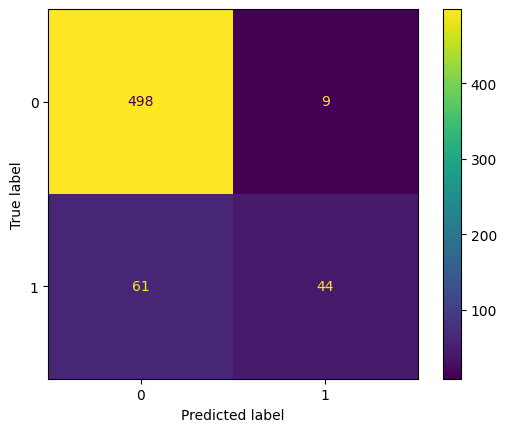

In [ ]:
cm = confusion_matrix(y_val, y_pred_val, labels=clf_logis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logis.classes_)
disp.plot()

#### **Random Forest**

In [ ]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_ranf_pre_train)
balanced_accuracy_val = balanced_accuracy_score(y_val, y_ranf_pre_val)
print(balanced_accuracy_train,balanced_accuracy_val)

1.0 0.8284023668639053


# Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
# Xác định các params để GridSearch chạy qua thử (nếu code chạy lâu quá, có thể giảm bớt số lượng params lại)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best parameters
# Ở đây mình dùng scoring là balanced_accuracy, mọi người có thể tùy chỉnh tùy vào mục đích model của mn nhé
grid_search = GridSearchCV(clf_rand, param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'bootstrap': False, 'max_depth': 20, 'n_estimators': 100}
Test set accuracy:  0.9706362153344209


# Feature Importances














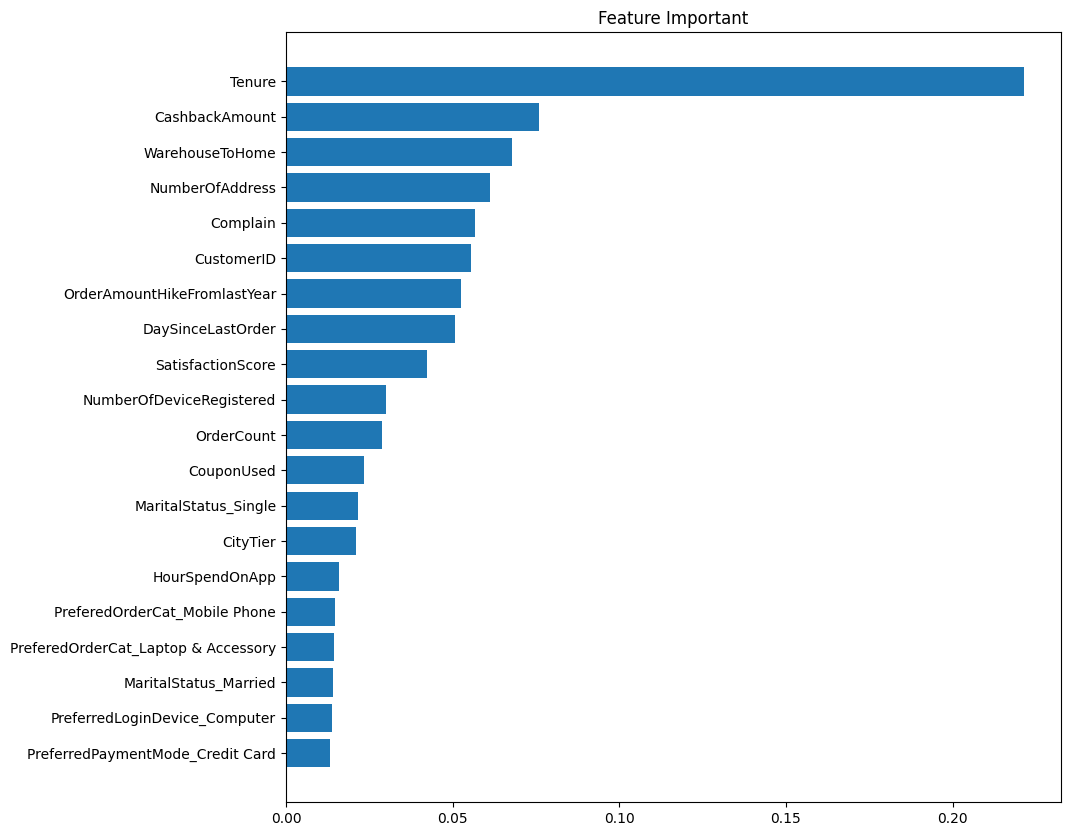

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test.columns, clf_rand.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

## Dimension Reduction


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


In [ ]:
pca = PCA(n_components=3)
pca.fit(df_encoded)
PCA_ds = pd.DataFrame(pca.transform(df_encoded), columns=(["col1","col2", "col3"]))
PCA_ds

,col1,col2,col3
0,187.731624,-62.661781,-8.620697
1,84.901300,-6.662346,-8.918343
2,-68.272817,-62.297380,1.046622
3,-310.072284,4.351108,12.217540
4,-487.025125,19.989046,0.452040
...,...,...,...
4076,292.967755,14.073565,-3.954462
4077,289.047723,40.942265,0.925277
4078,262.860540,-21.977827,-6.811244
4079,259.968294,14.142362,0.031772


In [ ]:
pca.explained_variance_ratio_

array([9.99643228e-01, 2.87883121e-04, 2.83848943e-05])

# Apply K Mean Model




1. Choosing K


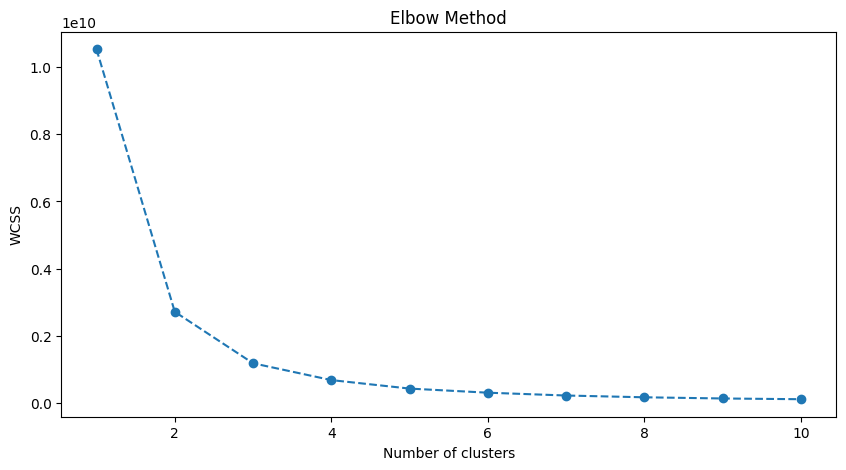

In [ ]:
ss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_ds)
    # Inertia method returns WCSS for that model
    ss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, max_clusters+1), ss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


2. Apply K-Means


In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(PCA_ds)

PCA_ds['clusters']=predicted_labels
churndf['clusters']=predicted_labels
print(churndf)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          52869      0    20.0         Mobile Phone         3   
2          52972      0    16.0         Mobile Phone         3   
3          53125      0     5.0         Mobile Phone         1   
4          53367      0     9.0         Mobile Phone         1   
5          53544      0     1.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5357       52764      0    11.0             Computer         1   
5358       52768      0     8.0                Phone         1   
5362       52794      0    14.0         Mobile Phone         3   
5363       52797      0    11.0         Mobile Phone         3   
5364       52808      0    12.0         Mobile Phone         3   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 7.0             E wallet  Female             4.0   
2                 7.0           Debit Card    Male             3.0 

### Evaluating Model:

#### 1. Silhouette Score:

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(PCA_ds, predicted_labels)
print(sil_score)

0.5651547444041084


#### 2. Distribution of clusters:

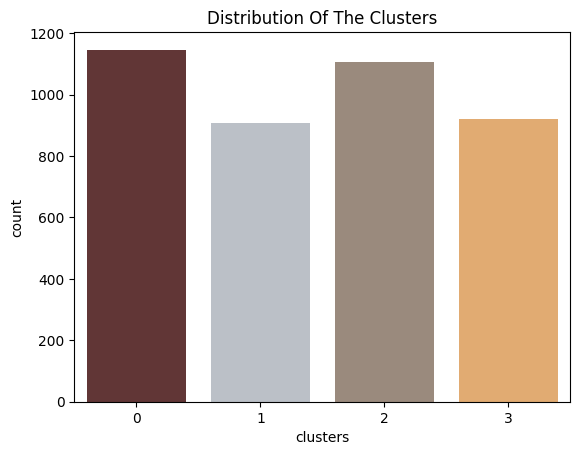

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=churndf["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
churndf.groupby(['clusters','PreferedOrderCat'])[['CustomerID']].count().reset_index()

,clusters,PreferedOrderCat,CustomerID
0,0,Fashion,144
1,0,Grocery,2
2,0,Laptop & Accessory,500
3,0,Mobile,2
4,0,Mobile Phone,493
5,0,Others,5
6,1,Fashion,209
7,1,Grocery,11
8,1,Laptop & Accessory,524
9,1,Mobile,63


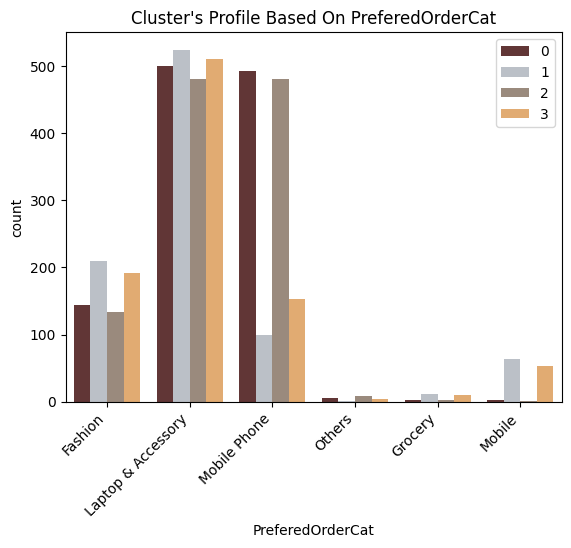

In [ ]:
pl = sns.countplot(data = churndf,x=churndf["PreferedOrderCat"],hue=churndf["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On PreferedOrderCat")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

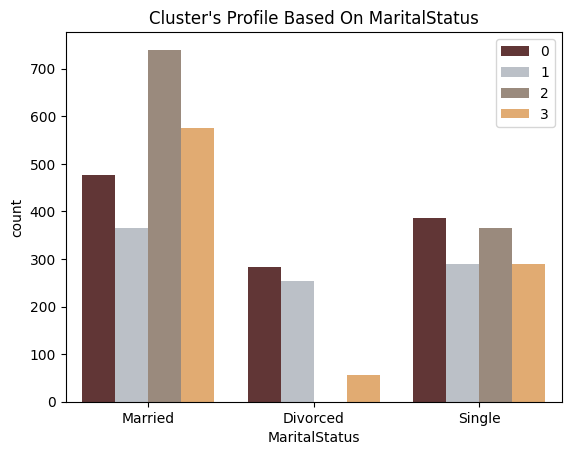

In [ ]:
pl = sns.countplot(data = churndf,x=churndf["MaritalStatus"],hue=churndf["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On MaritalStatus")
plt.legend()
plt.show()